# Student Performance Indicator

### Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

## 1) Problem statement

* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection

* Dataset Source: [https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)
* The data consists of 8 column and 1000 rows.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   
import warnings
warnings.filterwarnings('ignore')


In [31]:
df = pd.read_csv('../data/stud.csv')

In [32]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
df.shape

(1000, 8)

### 3. Data Checks to perform

* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [34]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [37]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [38]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight

* From the above description of numerical data, all means are very close to each other - between 66 and 68.05.
* All standard deviations are also close - between 14.6 and 15.19.
* While there is a minimum score of 0 for math, the minimum for writing is much higher at 10, and for reading is yet higher at 17.

In [39]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [40]:
print("Categories for 'gender' variable are: ", end="")
print(df['gender'].unique())  

print("Categories for 'race_ethnicity' variable are: ", end="")
print(df['race_ethnicity'].unique())   

print("Categories for 'parental_level_of_education' variable are: ", end="")
print(df['parental_level_of_education'].unique())  

print("Categories for 'lunch' variable are: ", end="")
print(df['lunch'].unique())   

print("Categories for 'test_preparation_course' variable are: ", end="")
print(df['test_preparation_course'].unique())   

Categories for 'gender' variable are: ['female' 'male']
Categories for 'race_ethnicity' variable are: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories for 'parental_level_of_education' variable are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories for 'lunch' variable are: ['standard' 'free/reduced']
Categories for 'test_preparation_course' variable are: ['none' 'completed']


In [42]:
numeric_feature = [col for col in df.columns if df[col].dtype != 'object']
categorical_feature = [col for col in df.columns if df[col].dtype == 'object']

print("Numeric features:", numeric_feature)
print(f"We have {len(numeric_feature)} numeric features:", numeric_feature)
print(f"We have {len(categorical_feature)} categorical features:", categorical_feature)


Numeric features: ['math_score', 'reading_score', 'writing_score']
We have 3 numeric features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Adding columns for 'Total Score' and 'Average Score'

In [43]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [44]:
full_marks_math = df[df['math_score'] == 100].shape[0]
full_marks_reading = df[df['reading_score'] == 100].shape[0]
full_marks_writing = df[df['writing_score'] == 100].shape[0]

print(f"Number of students with full marks in math: {full_marks_math}")
print(f"Number of students with full marks in reading: {full_marks_reading}")
print(f"Number of students with full marks in writing: {full_marks_writing}")

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [46]:
less_than_20_math = df[df['math_score'] < 20].shape[0]
less_than_20_reading = df[df['reading_score'] < 20].shape[0]
less_than_20_writing = df[df['writing_score'] < 20].shape[0]

print(f"Number of students with math score less than 20: {less_than_20_math}")
print(f"Number of students with reading score less than 20: {less_than_20_reading}")
print(f"Number of students with writing score less than 20: {less_than_20_writing}")

Number of students with math score less than 20: 4
Number of students with reading score less than 20: 1
Number of students with writing score less than 20: 3


## Insights

* From above values we get students have performed the worst in Maths
* Best performance is in reading section

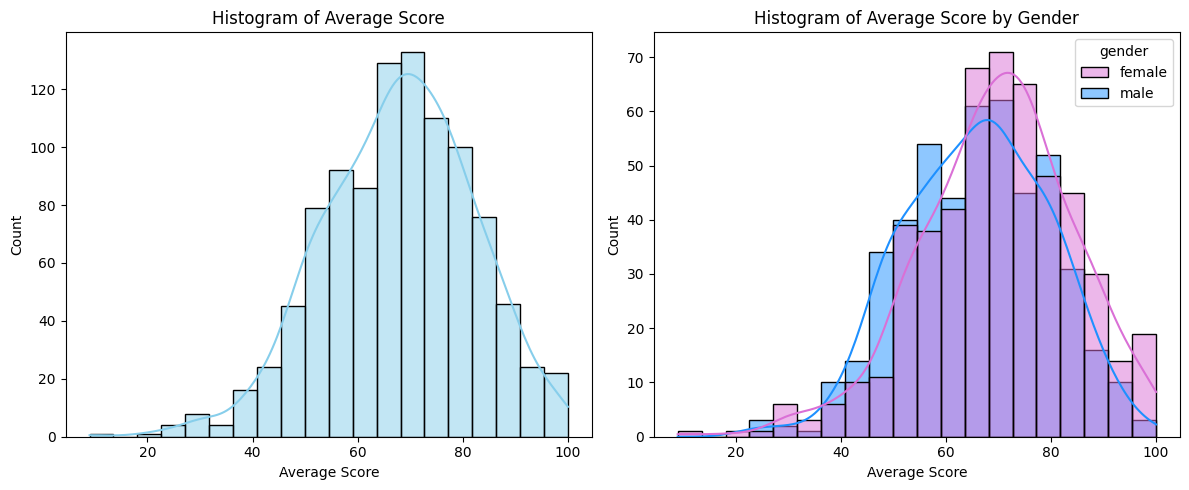

In [49]:
# Histogram of average score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['average'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Average Score')
plt.xlabel('Average Score')
plt.ylabel('Count')

# Histogram of average score with respect to gender
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='average', hue='gender', bins=20, kde=True, palette=gender_colors)
plt.title('Histogram of Average Score by Gender')
plt.xlabel('Average Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

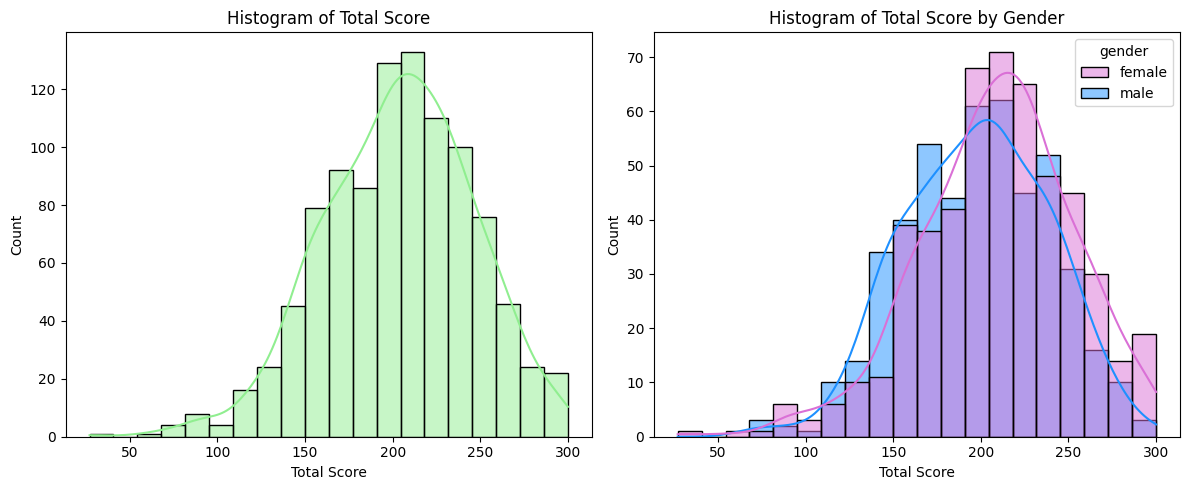

In [51]:
# Histogram of total score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['total_score'], bins=20, kde=True, color='lightgreen')
plt.title('Histogram of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Count')

# Histogram of total score with respect to gender
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_score', hue='gender', bins=20, kde=True, palette=gender_colors)
plt.title('Histogram of Total Score by Gender')
plt.xlabel('Total Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Insights
-- Female perform better then male students

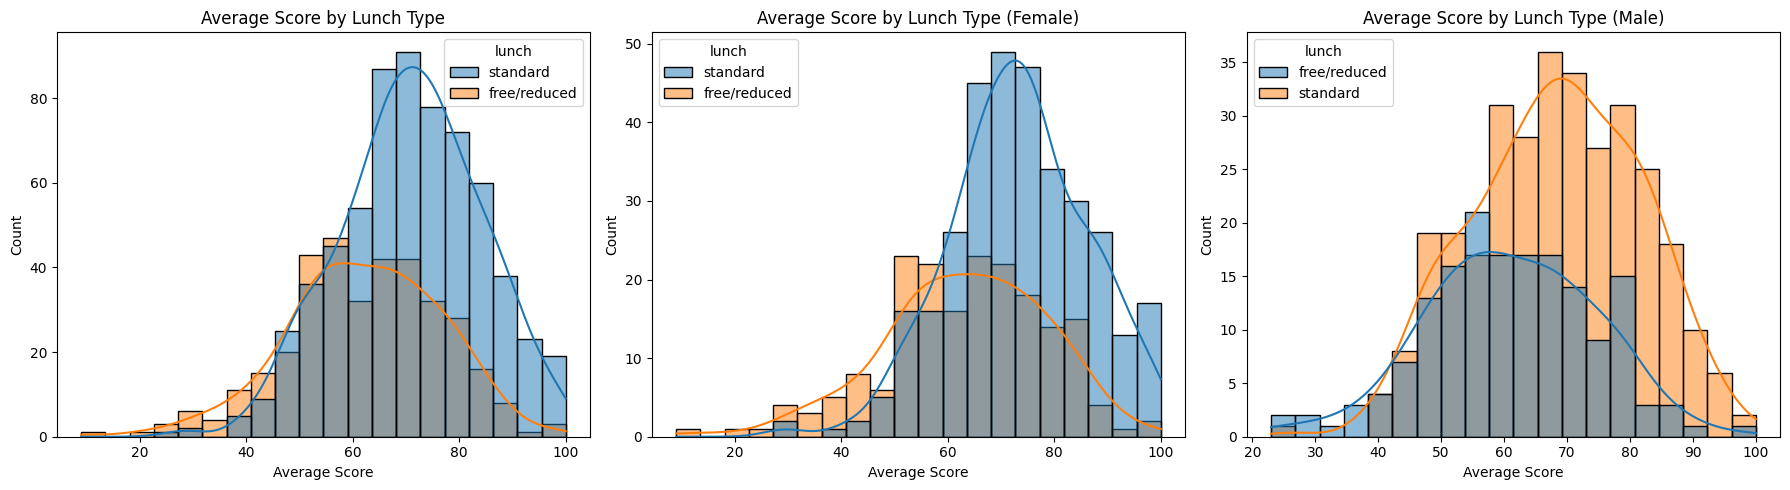

In [55]:
fig, axs_new = plt.subplots(1, 3, figsize=(18, 5))

# Histogram by lunch type
sns.histplot(data=df, x='average', hue='lunch', bins=20, kde=True, ax=axs_new[0])
axs_new[0].set_title('Average Score by Lunch Type')
axs_new[0].set_xlabel('Average Score')
axs_new[0].set_ylabel('Count')

# Histogram by lunch type + female
sns.histplot(data=df[df['gender'] == 'female'], x='average', hue='lunch', bins=20, kde=True, ax=axs_new[1])
axs_new[1].set_title('Average Score by Lunch Type (Female)')
axs_new[1].set_xlabel('Average Score')
axs_new[1].set_ylabel('Count')

# Histogram by lunch type + male
sns.histplot(data=df[df['gender'] == 'male'], x='average', hue='lunch', bins=20, kde=True, ax=axs_new[2])
axs_new[2].set_title('Average Score by Lunch Type (Male)')
axs_new[2].set_xlabel('Average Score')
axs_new[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


## Insights
Standard lunch time has helped both male and female students to perform better


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
